In [1]:
import tensorflow as tf

In [2]:
import tensorflow.keras as keras

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

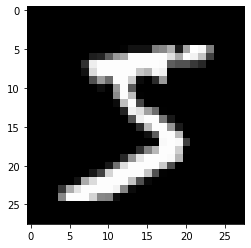

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [7]:
print(y_train[0])

5


In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

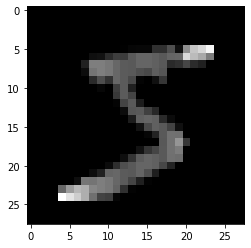

In [10]:
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [11]:
model = tf.keras.models.Sequential()

__A Sequential model just means things are going to go in direct order. A feed forward model. No going backwards...for now.__

In [13]:
model.add(tf.keras.layers.Flatten())

This will serve as our input layer. It's going to take the data we throw at it, and just flatten it for us. Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a __Dense layer__. This refers to the fact that it's a densely-connected layer, meaning it's "__fully connected__," where each node connects to each prior and subsequent node. Just like our image.

In [14]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

The activation function is relu, short for rectified linear.

In [15]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

In [16]:
#output layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is.

In [17]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss.

In [18]:
#fit
model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2651 - accuracy: 0.9212
Epoch 2/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1052 - accuracy: 0.9676
Epoch 3/3
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0722 - accuracy: 0.9772


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.0980 - accuracy: 0.9689
0.09802301929146051
0.9689


In [20]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [21]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [22]:
predictions = new_model.predict(x_test)

In [23]:
print(predictions)

[[3.0153102e-10 4.1403209e-07 1.5847999e-06 ... 9.9997282e-01
  2.3941712e-07 4.7800384e-08]
 [2.6059633e-08 2.5745190e-03 9.9741590e-01 ... 3.5813773e-07
  4.8993281e-09 1.6349503e-11]
 [3.2165229e-08 9.9929500e-01 1.4224036e-05 ... 4.0682266e-04
  2.3394835e-04 8.4997873e-07]
 ...
 [7.3766682e-10 3.9426911e-07 4.6426688e-08 ... 6.9351736e-06
  3.9751038e-05 1.5757318e-05]
 [5.5949928e-10 3.8154593e-07 8.8430889e-09 ... 1.4068435e-06
  1.0392050e-03 1.1170181e-09]
 [1.4996590e-07 3.2564230e-07 5.9331137e-06 ... 5.5502549e-09
  7.3642343e-07 2.7748653e-10]]


In [24]:
import numpy as np
print(np.argmax(predictions[0]))

7


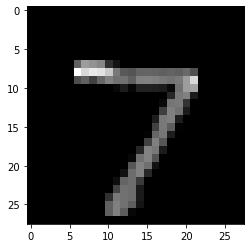

In [26]:
plt.imshow(x_test[0], cmap = 'gray')
plt.show()